# Instruction

Question: 
How is the distribution of current retail establishments, and do they offer good accessibility?

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import osmnx as ox 
import networkx as nx 
import matplotlib.cm as cm
import matplotlib.colors as colors

# Dataset

The street network dataset encompasses the area within a 2000-meter radius of London Dock. This is a 'drive network'.
Additionally, all relevant geometries within the network have been loaded to conduct the analysis.

In [2]:
G=ox.graph_from_address('London Dock, London', dist=2000, network_type='drive')
# ox.plot_graph(G)
# G.edges(data=True)

In [78]:
# some of the centrality measures are not implemented on multiGraph so first set as diGraph
DG = ox.get_digraph(G)
# nx.to_pandas_edgelist(G).head()

In [124]:
# Convert the graph G to GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Use the 'explore' method to create and display the map
Base_map = gdf_edges.explore(color='red')
# Base_map

In [125]:
# get the geometries 
tags= tags={'amenity': True, 'highway':True, 'landuse':True, 'building':True, 'waterway': True, 'railway': True}
all_geom=ox.geometries.geometries_from_address('London Dock, London', tags, dist=2000)
all_geom = all_geom.to_crs(epsg=3857)

/var/folders/ld/pth7mg7s14l5wgdlkxmx4hdm0000gn/T/ipykernel_26776/2672245919.py:3: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  all_geom=ox.geometries.geometries_from_address('London Dock, London', tags, dist=2000)


# Analysis and visualisation

In [126]:
# calculate edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_cc = nx.closeness_centrality(nx.line_graph(DG))
# set or inscribe the centrality measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG,edge_cc,'cc')
G1 = nx.MultiGraph(DG)

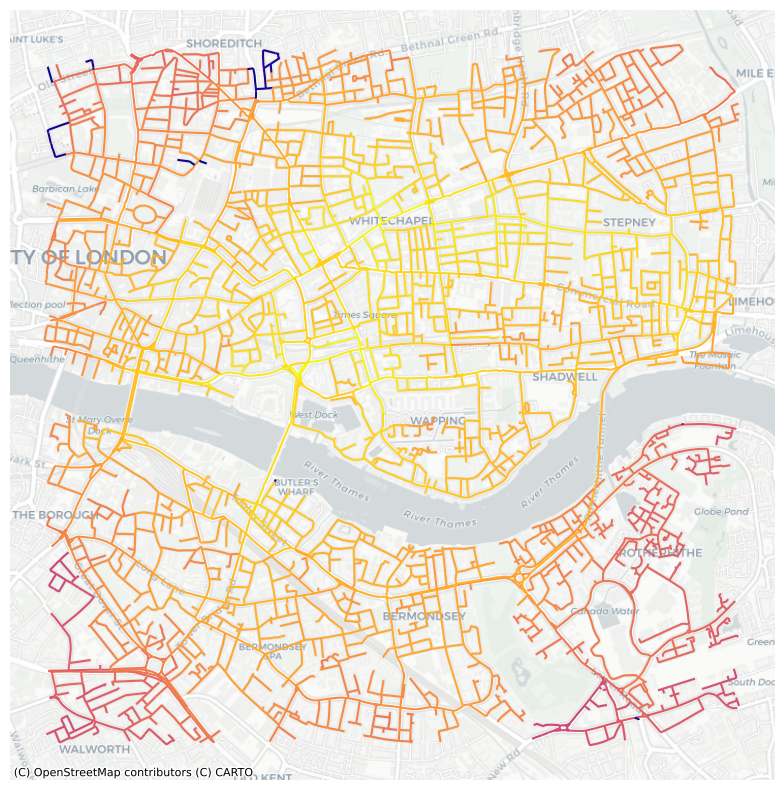

In [127]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G1,nodes=False,fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857

# plot edges according to degree centrality
ax=gdf_edges.plot('cc',cmap='plasma',figsize=(10,10))

# add a basemap using contextilly
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

In [129]:
# similarly, calculate edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_bc = nx.betweenness_centrality(nx.line_graph(DG))

# set or inscribe the betweenness centrality measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG,edge_bc,'bc')
G1 = nx.MultiGraph(DG)

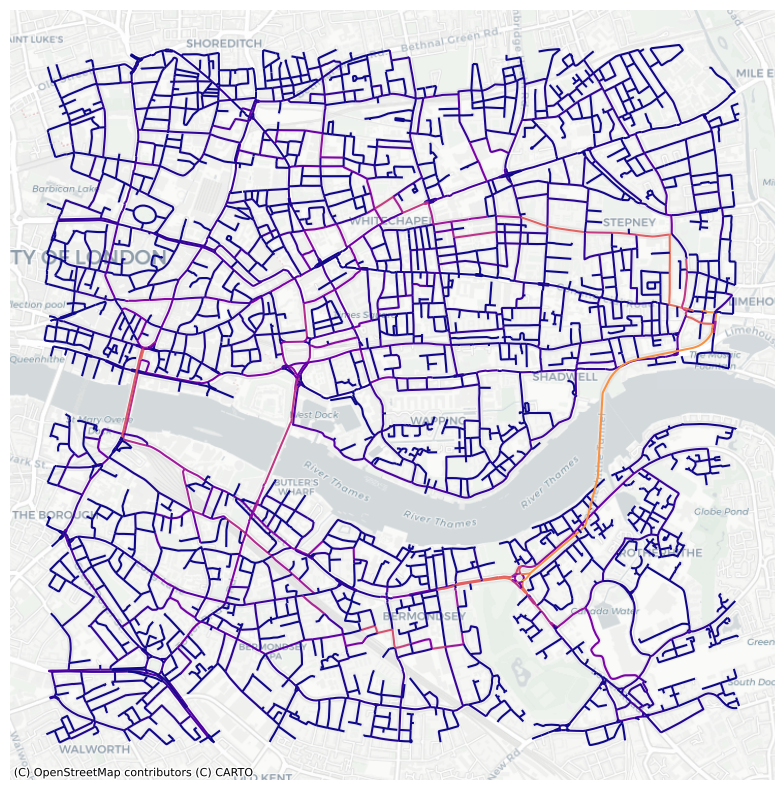

In [130]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G1,nodes=False,fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857

# plot edges according to degree centrality
ax=gdf_edges.plot('bc',cmap='plasma',figsize=(10,10))

# add a basemap using contextilly
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

In [134]:
# Filter to include only retail buildings
retail_buildings = all_geom[all_geom['building'] == 'retail']

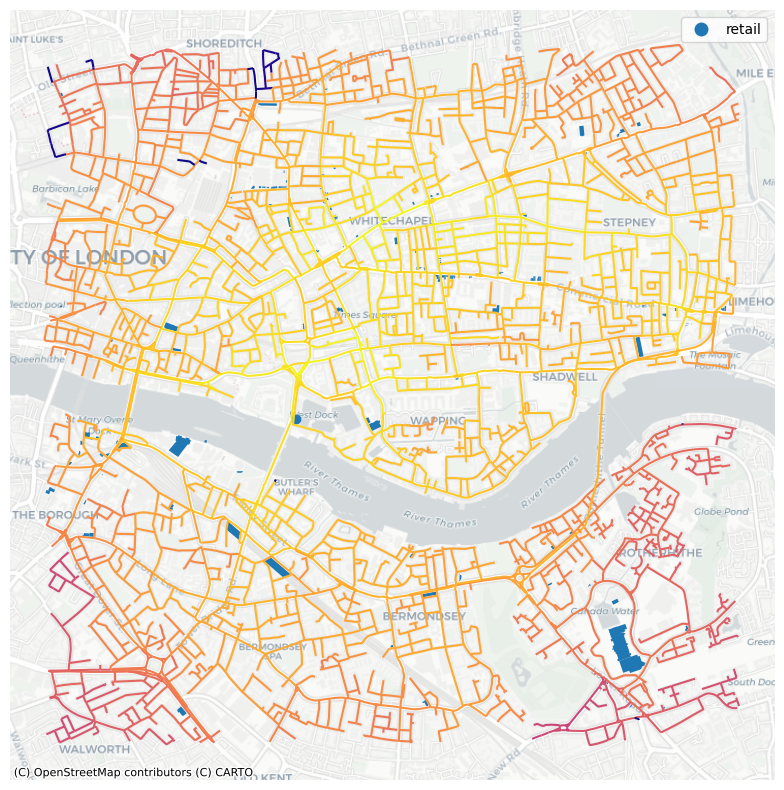

In [135]:
fig,ax = plt.subplots(figsize=(10,10))
# all_geom[all_geom['building'].notna()].plot(ax=ax,color='black')
gdf_edges.plot(ax=ax, column='cc',cmap='plasma',figsize=(10,10))
retail_buildings[retail_buildings['building'].notna()].plot('building',
                                            ax=ax,
                                            categorical=True,
                                            legend=True)
# all_geom[all_geom['building'].notna()].plot('building',
#                                             ax=ax,
#                                             categorical=True,
#                                             legend=True)
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

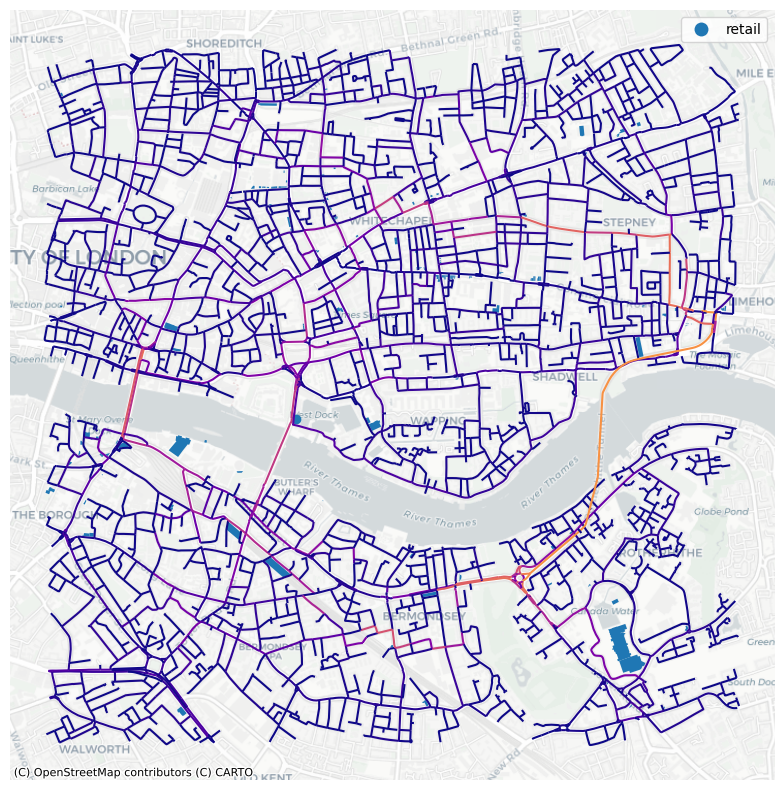

In [136]:
fig,ax = plt.subplots(figsize=(10,10))
# all_geom[all_geom['building'].notna()].plot(ax=ax,color='black')
gdf_edges.plot(ax=ax, column='bc',cmap='plasma',figsize=(10,10))
retail_buildings[retail_buildings['building'].notna()].plot('building',
                                            ax=ax,
                                            categorical=True,
                                            legend=True)
# all_geom[all_geom['building'].notna()].plot('building',
#                                             ax=ax,
#                                             categorical=True,
#                                             legend=True)
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

# Discussion

According to the closenness centrality map, most of the retails are distrubuted in the central of the neighbourhood, except for the big shopping mall in the southern-eastern corner, which indicated a poorer accessibility. This might be caused by the limited extent of the area.this is biased. additionaly, the betweenness centrality map illustrated that the big shopping mall has a relative good accessibility as there are more possibility the road nearby are went through 